In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


- The actual names of the features in this dataset are not shown for security reasons.
- Except `Time`, `Amount`, and `Class`, all the other features have means very close to 0, which is a common result of scaling methods that center the data, such as StandardScaler or RobustScaler. This indicates that for most variables, when averaged out, the deviations above and below zero (the center point) roughly balance out, suggesting a symmetric distribution around zero for scaled data. 
- The minimum, 25%, 75%, and maximum values provide insight into the distribution's spread and potential outliers. The fact that these values are not uniform across features but show a consistent scaling effect suggests a robust scaling method might have been used, which is less sensitive to outliers than standard scaling.
- `Class` column is a binary feature, with 0 represents non-fraudulent, and 1 represents fraudulent. We will only need to normalize `Time` and `Amount` column.

In [6]:
# check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# check the percentage of fraud and non-fraud transactions
fraud = df[df['Class']==1]
non_fraud = df[df['Class']==0]

print(f"There are {len(fraud)} ({round(len(fraud)/len(df)*100,2)}%)fraudulent transactions and {len(non_fraud)} ({round(len(non_fraud)/len(df)*100,2)}%) non-fraudulent transactions.")

There are 492 (0.17%)fraudulent transactions and 284315 (99.83%) non-fraudulent transactions.


The target variable we are trying to predict is extremely imbalanced. The model may become biased toward the majority class, this can lead to a model that performs well on accuracy metrics but poorly on metrics that are more sensitive to imbalances. Due to the lack of sufficient examples from the minority class, the model may struggle to learn the distinguishing features of this class, leading to poor generalization performance. As a result, instances of the minority class are more likely to be misclassified. To resolve this issue, I will try two approaches, undersampling and SMOTE.

# Normalizing Amount and Time

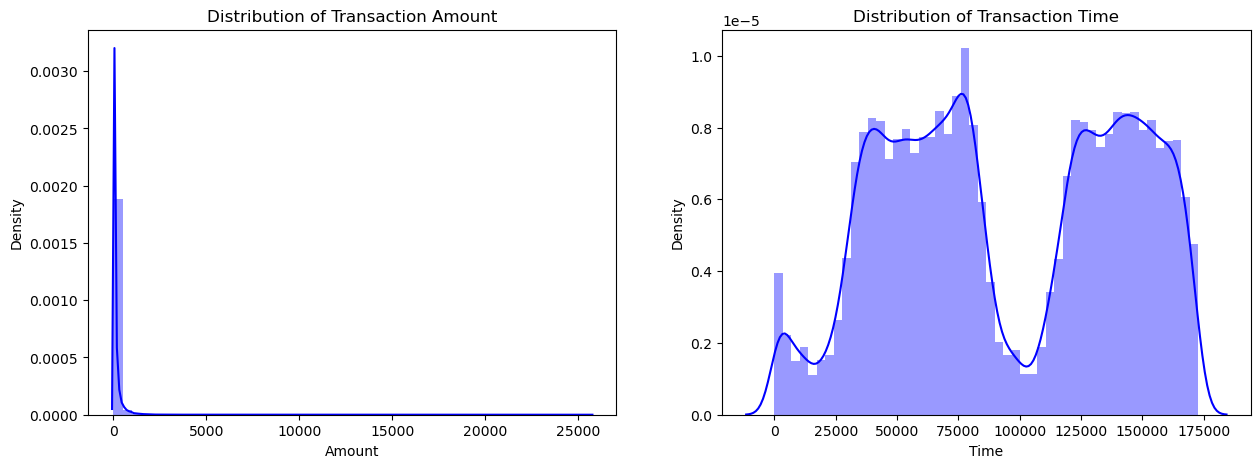

In [8]:
# create subplots for the distribution of features

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(df['Amount'], ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount')

sns.distplot(df['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time')

plt.show()

The distribution of `Amount` is heavily skewed to the right, and the long tail to the right suggests the presence of outliers. The `Time` column also does not follow a normal distribution. RobustScaler is the right choice here, since it is less sensitive to the outliers and is a better choice for data that's not normally distributed. I will apply the scaler in the modelling notebook.

# Correlation

In [9]:
# get correlation matrix
df_corr = df.corr()

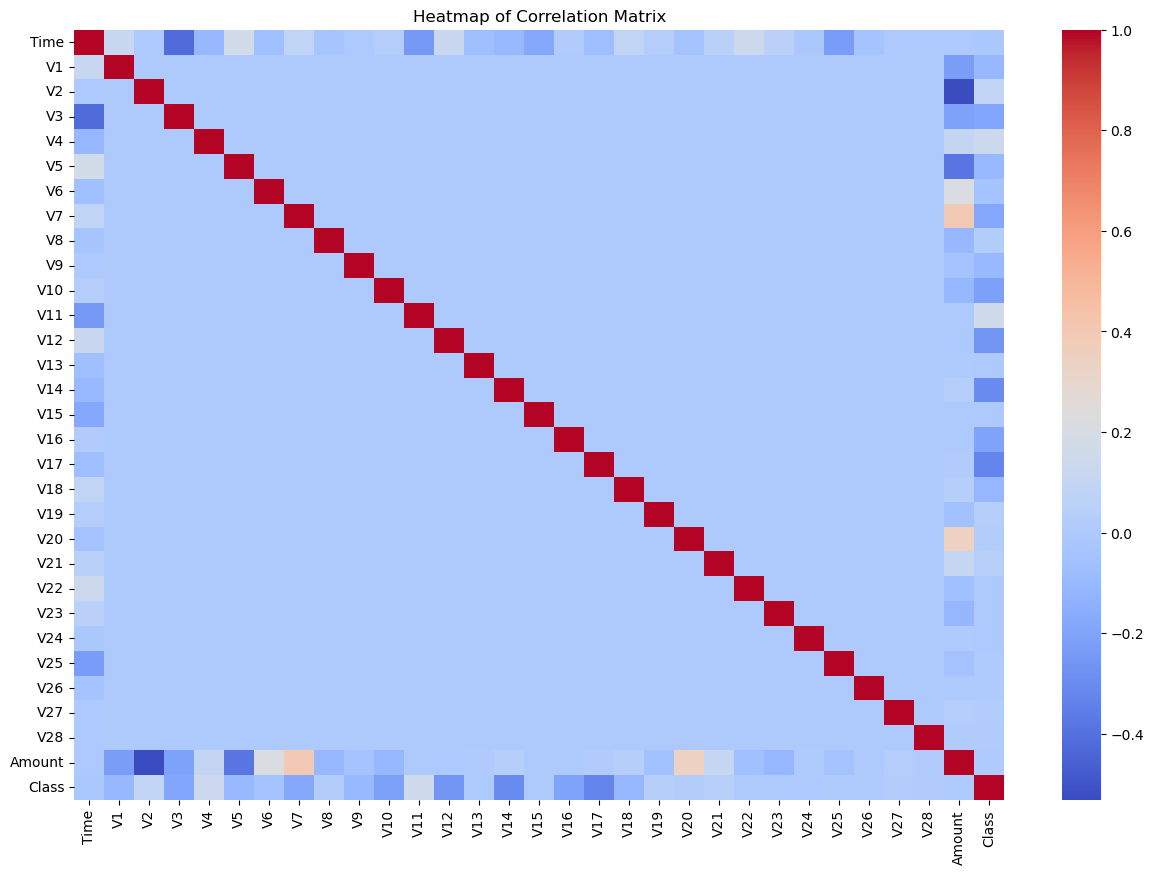

In [10]:
# create heatmap for correlation

plt.figure(figsize=(15,10))

sns.heatmap(df_corr,
           cmap='coolwarm')

plt.title('Heatmap of Correlation Matrix')
plt.show()

There is no multicollinearity in the dataset. But as we saw in the previous distribution graphs, there are potential outliers that could create biase and affect model performance. In the following modelling process, I will try to compare model performance before and after removing these outliers.

We will only remove the extreme outliers from the features that have a relatively high correlation to the target variable to minimize information loss. V10, V12, V14, and V17 are the only features have relatively high correlation to our target, and they will be our focus.

# Check for Outliers

In [11]:
# get the list of features to be removed outliers
features = ['V10','V12','V14','V17']

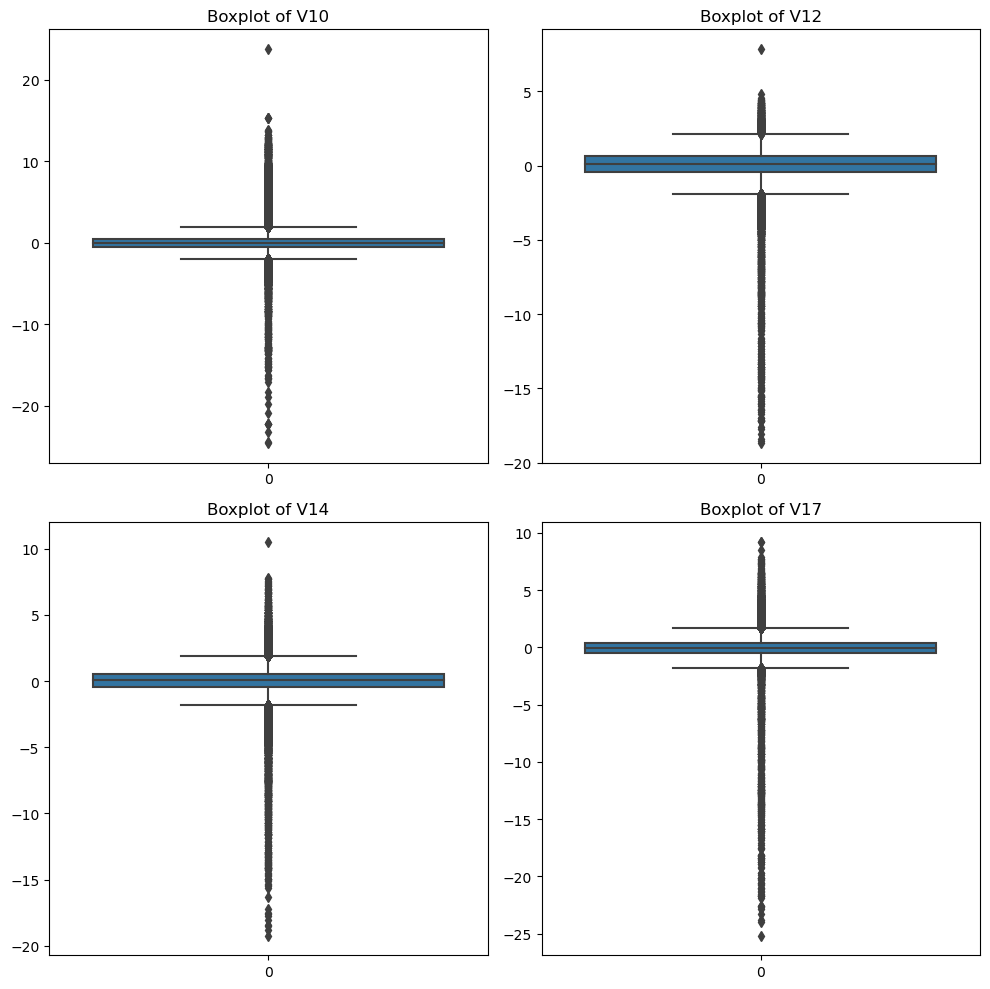

In [12]:
# create boxplots of the features
fig, ax = plt.subplots(2,2,figsize=(10,10))

ax = ax.flatten()

for i,col in enumerate(features):
    sns.boxplot(df[col],
                
                ax=ax[i])
    
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

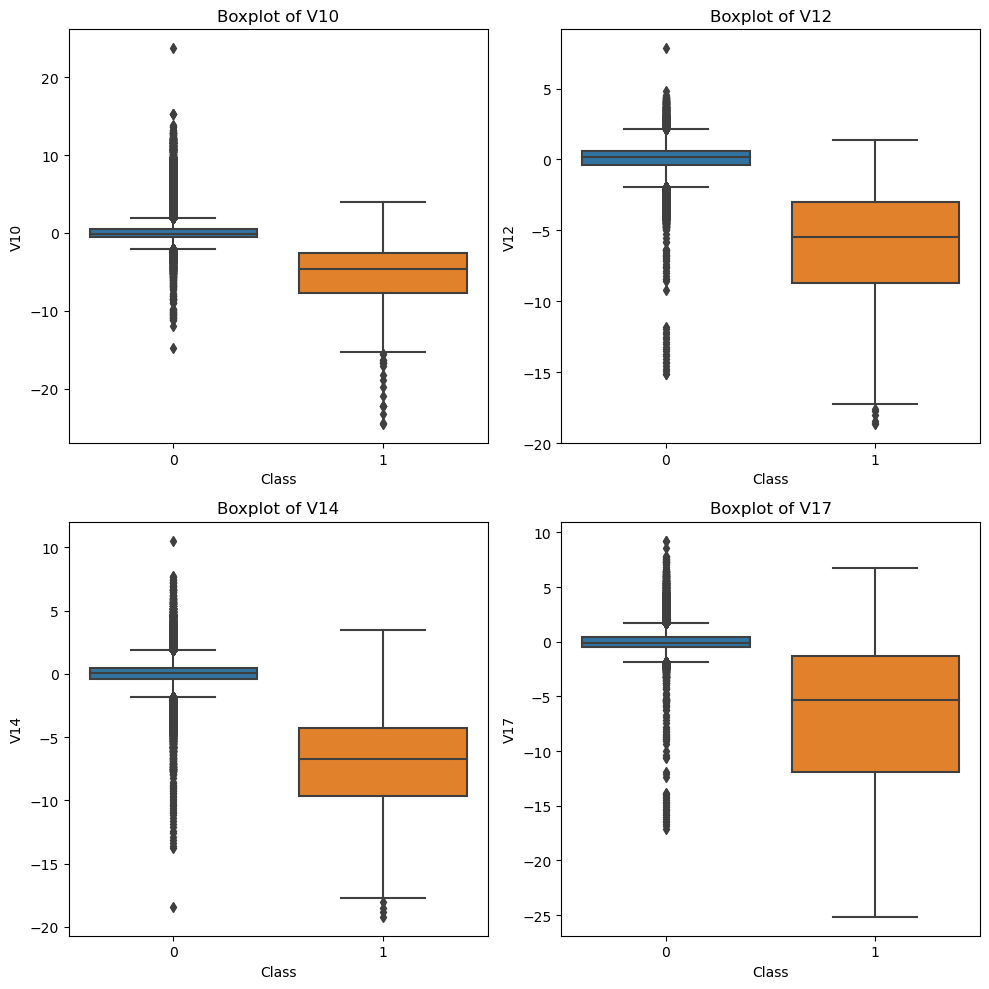

In [13]:
# create boxplots of the features
fig, ax = plt.subplots(2,2,figsize=(10,10))

ax = ax.flatten()

for i,col in enumerate(features):
    sns.boxplot(y=df[col],
                x=df['Class'],
                ax=ax[i])
    
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- For features V10, V12, V14, and V17, the distributions for fraudulent transactions (Class 1) are significantly different from those of non-fraudulent transactions (Class 0), particularly in their central tendency and spread. This difference is a good indicator that these features are valuable for distinguishing between fraudulent and non-fraudulent transactions. All features show the presence of outliers in both classes, but notably more pronounced in the non-fraud group (Class 0).
- The outliers in the non-fraud group tend to skew towards lower values for features V12, V14, and V17 and towards higher values for V10. 
- Given the nature of fraud detection, where fraudulent transactions might inherently be "outliers" in terms of their behavior or characteristics, one should be very cautious about removing outliers from the fraud class. These "outliers" might actually represent rare but valid patterns of fraudulent activity.
- For the non-fraud class, outliers might represent noise or extreme non-fraudulent behaviors that could potentially confuse the model. Removing or capping these outliers could help the model learn better by focusing on the "normal" range of behavior. I will only remove the outliers from non-fraud group in this project.

# Hypothesis Testing

In [14]:
# get all coded features 
columns = [col for col in df.columns if 'V' in col]

len(columns)

28

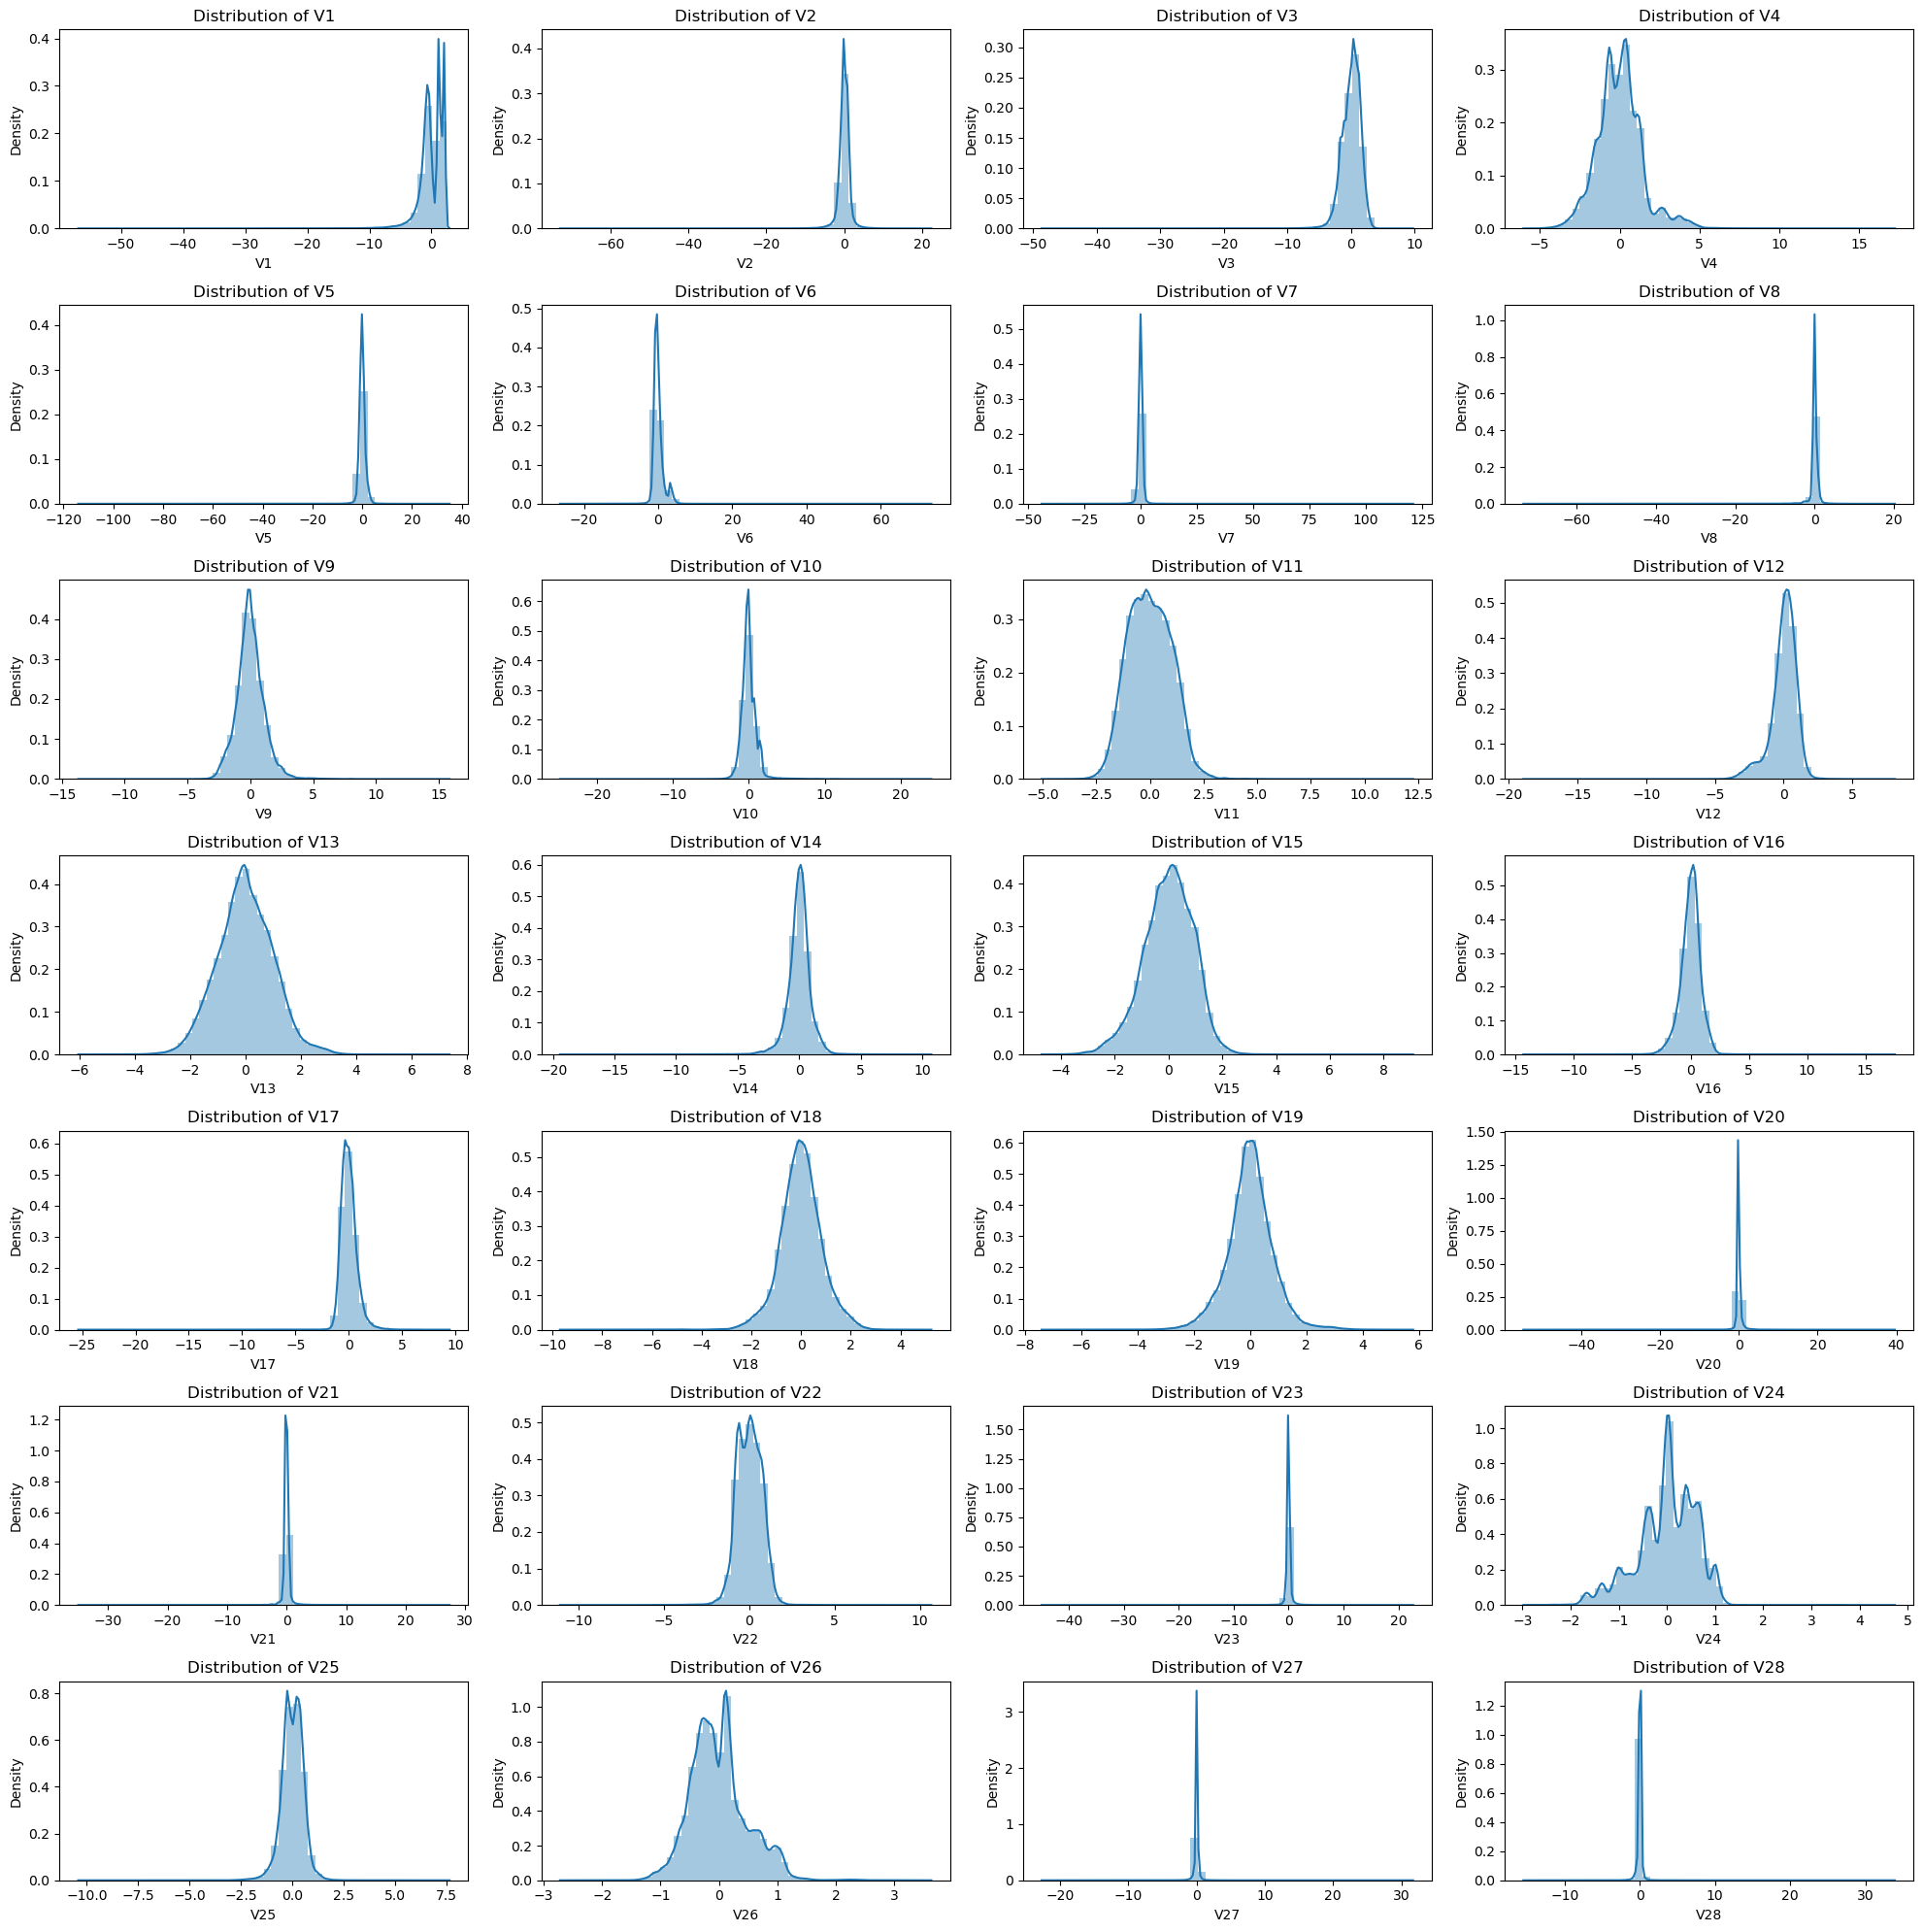

In [15]:
# visualize distributions of the features
fig, ax = plt.subplots(7,4,figsize=(20,20))

ax = ax.flatten()

for i,col in enumerate(columns):
    sns.distplot(df[col],
                ax=ax[i])
    
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

All the features are numerical and the majority of them do not follow normal distribution, I am going to use Mann-Whitney U Test to examine if the distribution differs between fraudulent and non-fraudulent transactions. Let's make our hypotheses:
- $H_0$: The distiributions of the numeric feature are the same between fraudulent and non-fraudulent transactions.
- $H_1$: The distiributions of the numeric feature are the different between fraudulent and non-fraudulent transactions.

In [16]:
# perform Mann-Whitney U test

# loop through features
for i in columns:
    
    stat,p = mannwhitneyu(non_fraud[i],fraud[i])
    
    # print results
    print(f"The p-value for {i} is: {p}\n")
    print(f"Significant? {p<0.05}\n")   
    print('='*40)

The p-value for V1 is: 1.74078470704578e-113

Significant? True

The p-value for V2 is: 1.6504376983790665e-163

Significant? True

The p-value for V3 is: 1.2110480361161294e-219

Significant? True

The p-value for V4 is: 3.625904437063816e-248

Significant? True

The p-value for V5 is: 3.0537119618414104e-58

Significant? True

The p-value for V6 is: 2.231002470170286e-93

Significant? True

The p-value for V7 is: 1.4642336565270678e-146

Significant? True

The p-value for V8 is: 8.50989149282899e-34

Significant? True

The p-value for V9 is: 8.943723386517164e-154

Significant? True

The p-value for V10 is: 9.611130933483015e-222

Significant? True

The p-value for V11 is: 4.910591830672246e-226

Significant? True

The p-value for V12 is: 8.416026601180421e-247

Significant? True

The p-value for V13 is: 0.051214811167866046

Significant? False

The p-value for V14 is: 1.4715806820794069e-260

Significant? True

The p-value for V15 is: 0.12950821497825638

Significant? False

The p-v

For feature V13, V15, and V22, we failed to reject the hypothesis (i.e. the distributions for these features between the two groups are not significantly different) but this does not mean they have no predictive value for our models. We should keep them for now, and further examine the feature importance later.

# Visualizing Clusters with Dimensionality Reduction

Visualization of the clustering help reveal natural groupings patterns, and structures in the data that might not be apparent from statistical analysis alone. And for our dataset, features are encoded, this process will help us in understanding the relationships between different features and how they contribute to the formation of clusters. Additionally, it provides insights into the data’s underlying structure and the effectiveness of the dimensionality reduction process.

**Dimensionality Reduction Techniques to Try:**
- PCA
- T-SNE

Note: `Amount` and `Time` are not normalized and larger in scale than other scaled features,  thu PCA and T-SNE might disproportionately emphasize features with larger scales. In order for the clustering to work properly, we need to scale these two features first.

In [17]:
# instantiate RobustScaler
rs = RobustScaler()

# fit transform
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

# drop original columns
df.drop(['Time','Amount'], axis=1, inplace=True)

In [28]:
# put scaled data into the dataframe
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# check
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [29]:
# assign independent and target variables
X = df.drop(columns='Class')
y = df['Class']

In [20]:
# due to the sheer size of this dataset apply T-SNE could be very computational expensive
# I will conduct the undersampling on the dataset to balance the two classes first

# instantiate RandomUnderSampler
us = RandomUnderSampler()

# fit and transform
X_us, y_us = us.fit_resample(X,y)


# check resampled class proportion
print(f'Undersampled data set:\n{round(y_us.value_counts(normalize=True)*100,2)}')

Undersampled data set:
0    50.0
1    50.0
Name: Class, dtype: float64


In [21]:
# apply PCA
X_pca = PCA(n_components=2,random_state=42).fit_transform(X_us)

# apply T-SNE
X_tsne = TSNE(n_components=2,random_state=42).fit_transform(X_us)

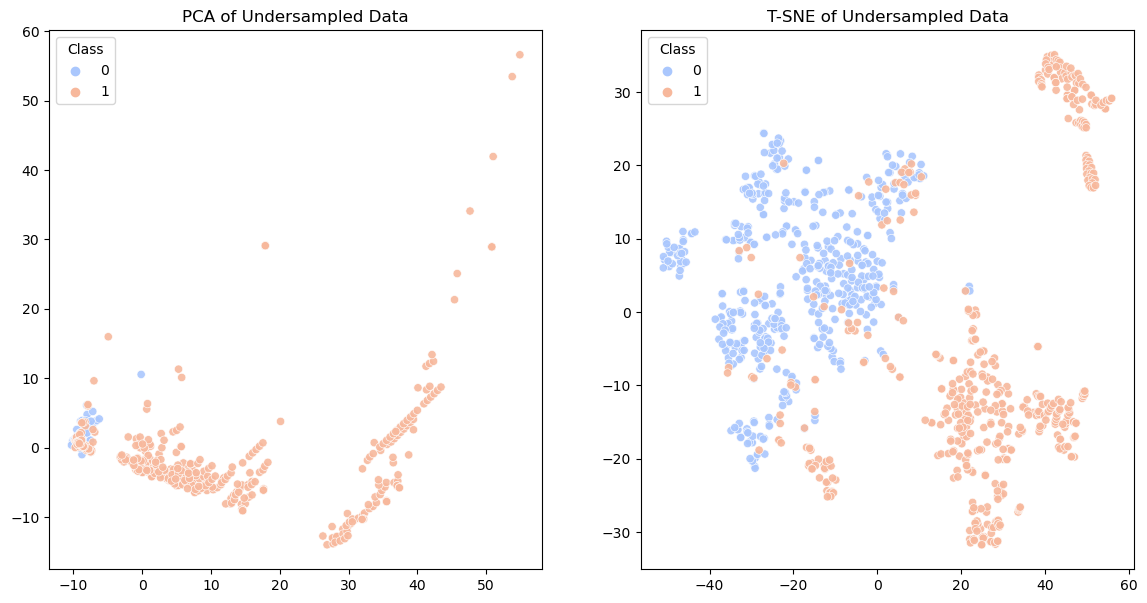

In [30]:
# plot the resulted clusters

# for PCA
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_us, palette='coolwarm', alpha=0.9)
plt.title('PCA of Undersampled Data')

# for t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_us, palette='coolwarm', alpha=0.9)
plt.title('T-SNE of Undersampled Data')

# Show the plots
plt.show()

- The plots show some degree of overlapping between the classes in both PCA and t-SNE indicates areas where the classes are not easily distinguishable based on the reduced features. This might suggest the need for more complex models to capture the nuances or additional feature engineering.
- Clear separation in t-SNE suggests that non-linear models (e.g., kernel SVMs, ensemble tree-based methods) might perform well.